In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set()
sns.set_context('poster')


In [3]:
df = pd.read_csv('/content/survey_results_public.csv', index_col='ResponseId')

In [ ]:
df.columns

Index(['MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'TechDoc',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'ConvertedCompYearly', 'JobSat'],
      dtype='object', length=113)

In [4]:
df_schema = pd.read_csv('/content/survey_results_schema.csv', index_col='qid')

In [ ]:
df_schema

,qname,question,force_resp,type,selector
qid,,,,,
QID2,MainBranch,Which of the following options best describes ...,True,MC,SAVR
QID127,Age,What is your age?*,True,MC,SAVR
QID296,Employment,Which of the following best describes your cur...,True,MC,MAVR
QID308,RemoteWork,Which best describes your current work situation?,False,MC,SAVR
QID341,Check,Just checking to make sure you are paying atte...,True,MC,SAVR
...,...,...,...,...,...
QID337,JobSatPoints_7,"Learning and using new technology, including p...",NaN,MC,MAVR
QID337,JobSatPoints_8,"Designing and building environments, databases...",NaN,MC,MAVR
QID337,JobSatPoints_9,"Being a power user of a tool, developer langua...",NaN,MC,MAVR


In [ ]:
#limpando o arquivo que possue trechos de HTML

In [5]:
def remove_html (html):
  pattern = re.compile('<.*?>')
  cleantext = re.sub(pattern, '', html)
  return cleantext.replace('*', '').strip()

In [6]:

for name , description in zip (df_schema['qname'], df_schema['question']):
  print(f'{name} : {remove_html(description)}')

MainBranch : Which of the following options best describes you today? For the purpose of this survey, a developer is "someone who writes code".
Age : What is your age?
Employment : Which of the following best describes your current employment status? Select all that apply.
RemoteWork : Which best describes your current work situation?
Check : Just checking to make sure you are paying attention to the survey questions. Select ‘Apples’ from the list and you can get back to the survey.
CodingActivities : Which of the following best describes the code you write outside of work? Select all that apply.
EdLevel : Which of the following best describes the highest level of formal education that you’ve completed?
LearnCode : How do you learn to code? Select all that apply.
LearnCodeOnline : What online resources do you use to learn to code? Select all that apply.
TechDoc : What is the source of the technical documentation you use most often to learn to code?  Select all that apply.
YearsCode : I

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65437 entries, 1 to 65437
Columns: 113 entries, MainBranch to JobSat
dtypes: float64(13), object(100)
memory usage: 56.9+ MB


In [7]:
def percent (value):
  return f'{100 * value:.2f}%'

In [8]:
#descobrindo dados nulos na base, e tabalhando com eles

#quantidade de valores nulos por coluna
df.isna().sum()

,0
MainBranch,0
Age,0
Employment,0
RemoteWork,3046
Check,0
...,...
JobSatPoints_11,9263
SurveyLength,325
SurveyEase,303
ConvertedCompYearly,8554


In [9]:
#porcentagem de valores nulos por coluna

(df.isna().sum() / len(df)).sort_values(ascending=False).apply(percent)

,0
AINextMuch less integrated,98.00%
AINextLess integrated,95.94%
AINextNo change,78.97%
AINextMuch more integrated,77.21%
EmbeddedAdmired,72.71%
...,...
Age,0.00%
EdLevel,0.00%
Check,0.00%
Employment,0.00%


In [10]:
#analise grafica dos valores nulos

percent_data = (df.isna().sum() / len(df)).sort_values(ascending=False).apply(percent).reset_index()


In [11]:
percent_data.columns = ['column_name','percent']
percent_data

,column_name,percent
0,AINextMuch less integrated,98.00%
1,AINextLess integrated,95.94%
2,AINextNo change,78.97%
3,AINextMuch more integrated,77.21%
4,EmbeddedAdmired,72.71%
...,...,...
108,Age,0.00%
109,EdLevel,0.00%
110,Check,0.00%
111,Employment,0.00%


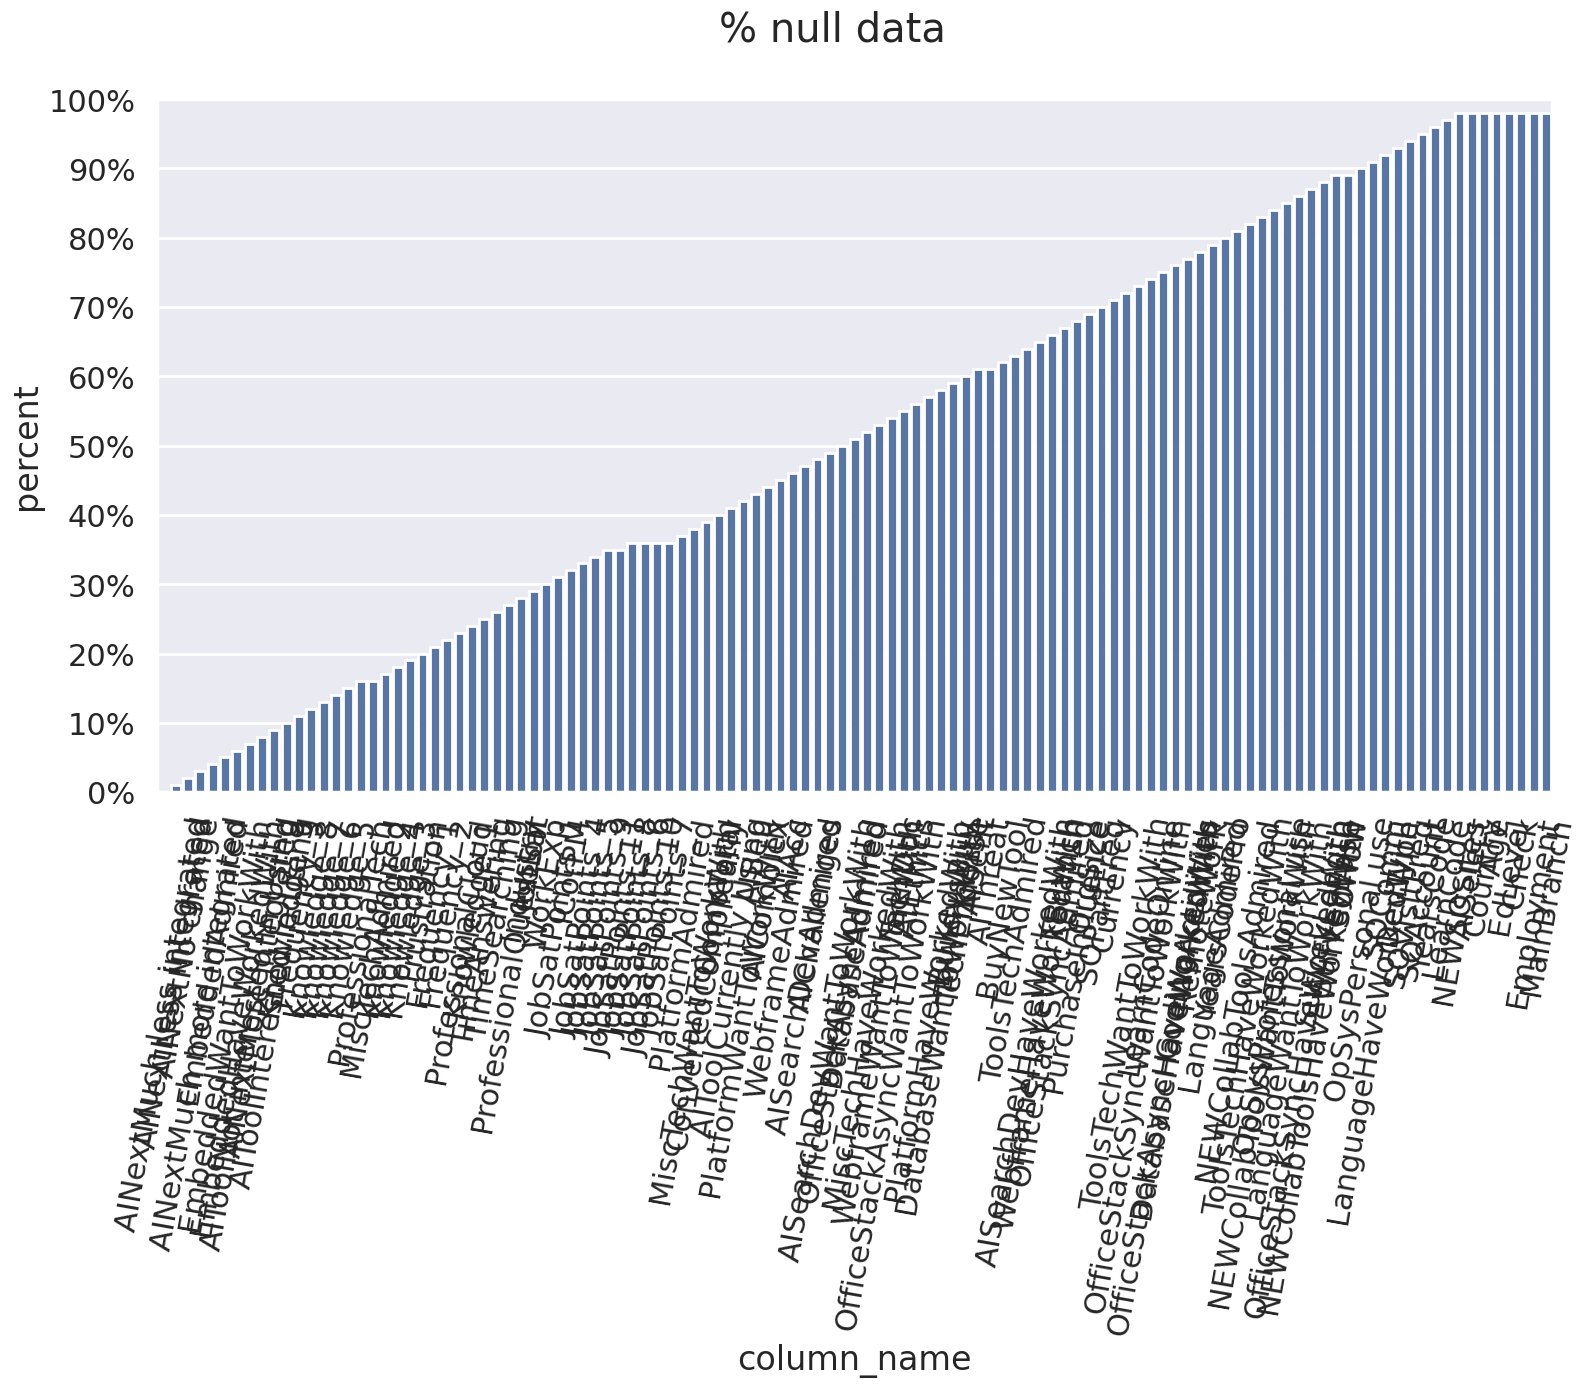

In [12]:
fig, ax = plt.subplots(figsize=(18,9))

sns.barplot(data=percent_data, x='column_name', y='percent', ax=ax)
fig.suptitle('% null data')
plt.xticks(rotation=80)
ax.set_ylim(0, 100)


# Formatando os rótulos do eixo Y como porcentagem
ax.set_yticks(range(0, 110, 10))  # Define os ticks a cada 10%
ax.set_yticklabels([f"{tick}%" for tick in ax.get_yticks()])


plt.show()

In [ ]:
# Encontrando os dados numericos

In [ ]:
df.select_dtypes('number')

,CompTotal,WorkExp,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,ConvertedCompYearly,JobSat
ResponseId,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65433,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65434,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65435,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df[['WorkExp', 'ConvertedCompYearly']].describe().round(2)

,WorkExp,ConvertedCompYearly
count,10761.00,11527.00
mean,11.36,86835.59
std,9.04,232490.59
min,0.00,1.00
25%,4.00,32222.00
50%,9.00,64570.00
75%,16.00,107406.00
max,50.00,16256603.00


In [ ]:
#dados nao numericos

In [14]:
df.select_dtypes('object')

,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,...,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,SurveyLength,SurveyEase
ResponseId,,,,,,,,,,,,,,,,,,,,,
1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy
4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy
5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,API document(s) and/or SDK document(s);User gu...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20077,I am a developer by profession,25-34 years old,"Employed, full-time",In-person,Apples,Bootstrapping a business;Professional developm...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);First-p...,...,Never,Over 120 minutes a day,60-120 minutes a day,Number of software tools in use;Complexity of ...,DevOps function;Automated testing;Observabilit...,Hybrid (on-prem and cloud),AI-powered search (free),Software Development,Appropriate in length,Neither easy nor difficult
20078,"I used to be a developer by profession, but no...",45-54 years old,"Independent contractor, freelancer, or self-em...",Remote,Apples,Hobby;Contribute to open-source projects;Profe...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult
20079,I am a developer by profession,35-44 years old,"Employed, full-time;Independent contractor, fr...","Hybrid (some remote, some in-person)",Apples,Professional development or self-paced learnin...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Colleague;On the job training;Other online res...,Technical documentation;Written Tutorials;Stac...,API document(s) and/or SDK document(s);Traditi...,...,1-2 times a week,60-120 minutes a day,15-30 minutes a day,Amount of technical debt;Complexity of tech st...,DevOps function;Microservices,Hybrid (on-prem and cloud),Traditional public search engine,Other:,Appropriate in length,Easy


In [ ]:
df['RemoteWork'].value_counts(normalize=True, dropna=False)

,proportion
RemoteWork,
"Hybrid (some remote, some in-person)",0.351712
Remote,0.318337
In-person,0.167489
NaN,0.162462


In [ ]:
df['RemoteWork'].unique()

array(['Remote', nan, 'In-person', 'Hybrid (some remote, some in-person)'],
      dtype=object)

In [ ]:
df[['Age', 'RemoteWork']].value_counts().sort_index()

Age                 RemoteWork                          
18-24 years old     Hybrid (some remote, some in-person)    3524
                    In-person                               3034
                    Remote                                  2509
25-34 years old     Hybrid (some remote, some in-person)    9765
                    In-person                               4597
                    Remote                                  7984
35-44 years old     Hybrid (some remote, some in-person)    5980
                    In-person                               1882
                    Remote                                  6377
45-54 years old     Hybrid (some remote, some in-person)    2531
                    In-person                                859
                    Remote                                  2520
55-64 years old     Hybrid (some remote, some in-person)     929
                    In-person                                366
                    Remote                                   992
65 years or older   Hybrid (some remote, some in-person)     120
                    In-person                                 78
                    Remote                                   199
Prefer not to say   Hybrid (some remote, some in-person)      40
                    In-person                                 24
                    Remote                                    57
Under 18 years old  Hybrid (some remote, some in-person)     126
                    In-person                                120
                    Remote                                   193
Name: count, dtype: int64

In [ ]:
#analise grafica

In [ ]:
df['WorkExp'].describe()

,WorkExp
count,29658.000000
mean,11.466957
std,9.168709
min,0.000000
25%,4.000000
50%,9.000000
75%,16.000000
max,50.000000


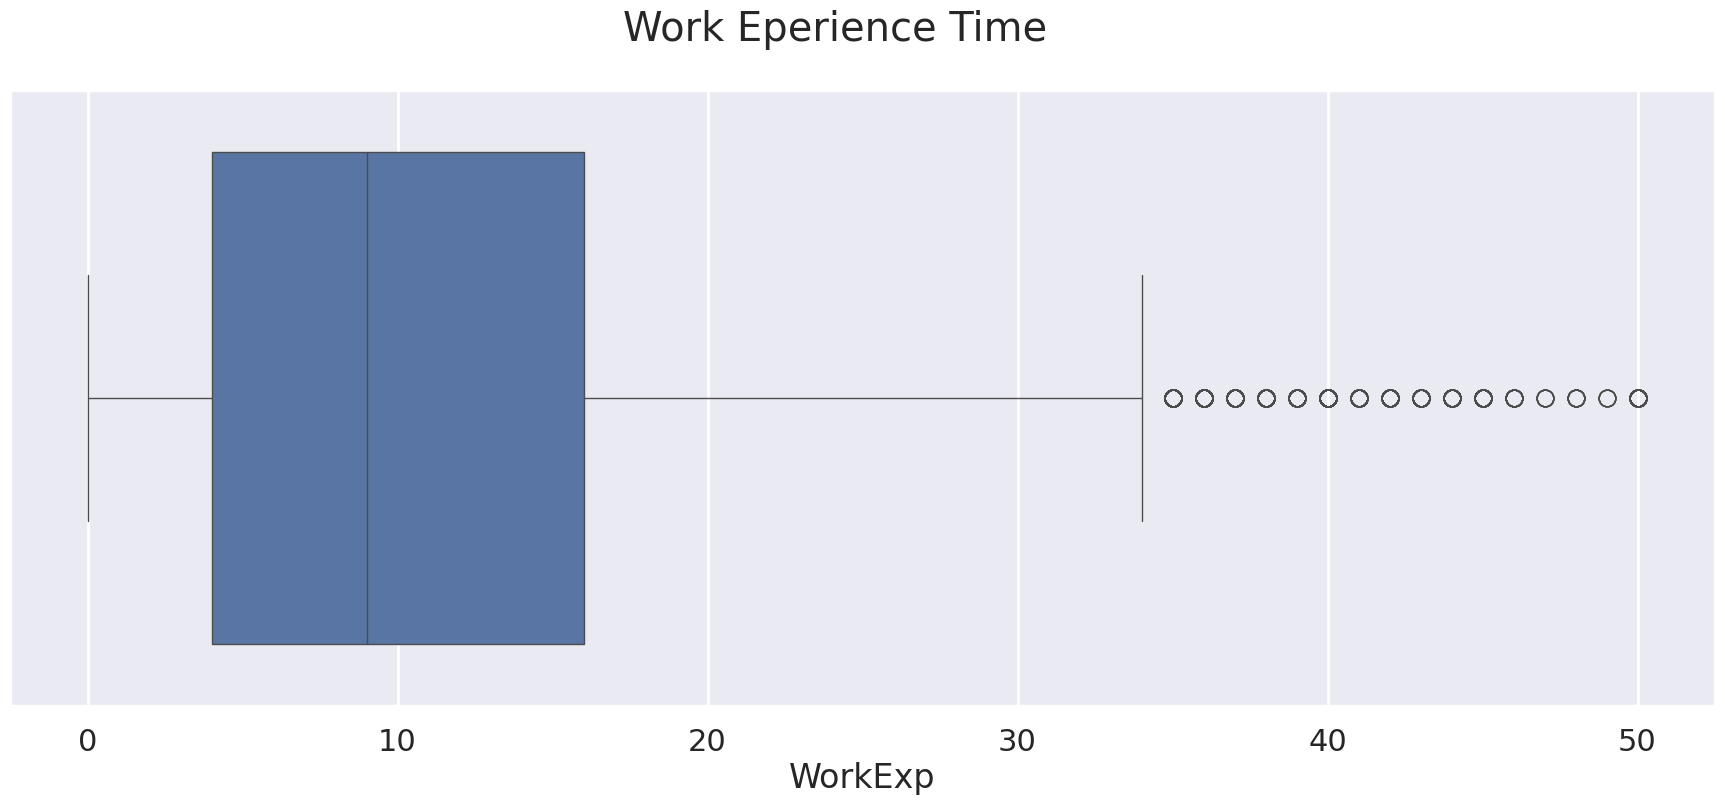

In [ ]:
fig, ax = plt.subplots(figsize=(22,8))

sns.boxplot(data=df, x='WorkExp')
fig.suptitle('Work Eperience Time')

plt.show()


In [ ]:
#visualizar os valores reais de cada resposta

In [ ]:
ax_noise = np.random.uniform(-0.1, 0.1, len(df))

In [ ]:
x_scatter = df['WorkExp'] + ax_noise

In [ ]:
y_scatter = np.random.uniform(-0.3, 0.3, len(df))

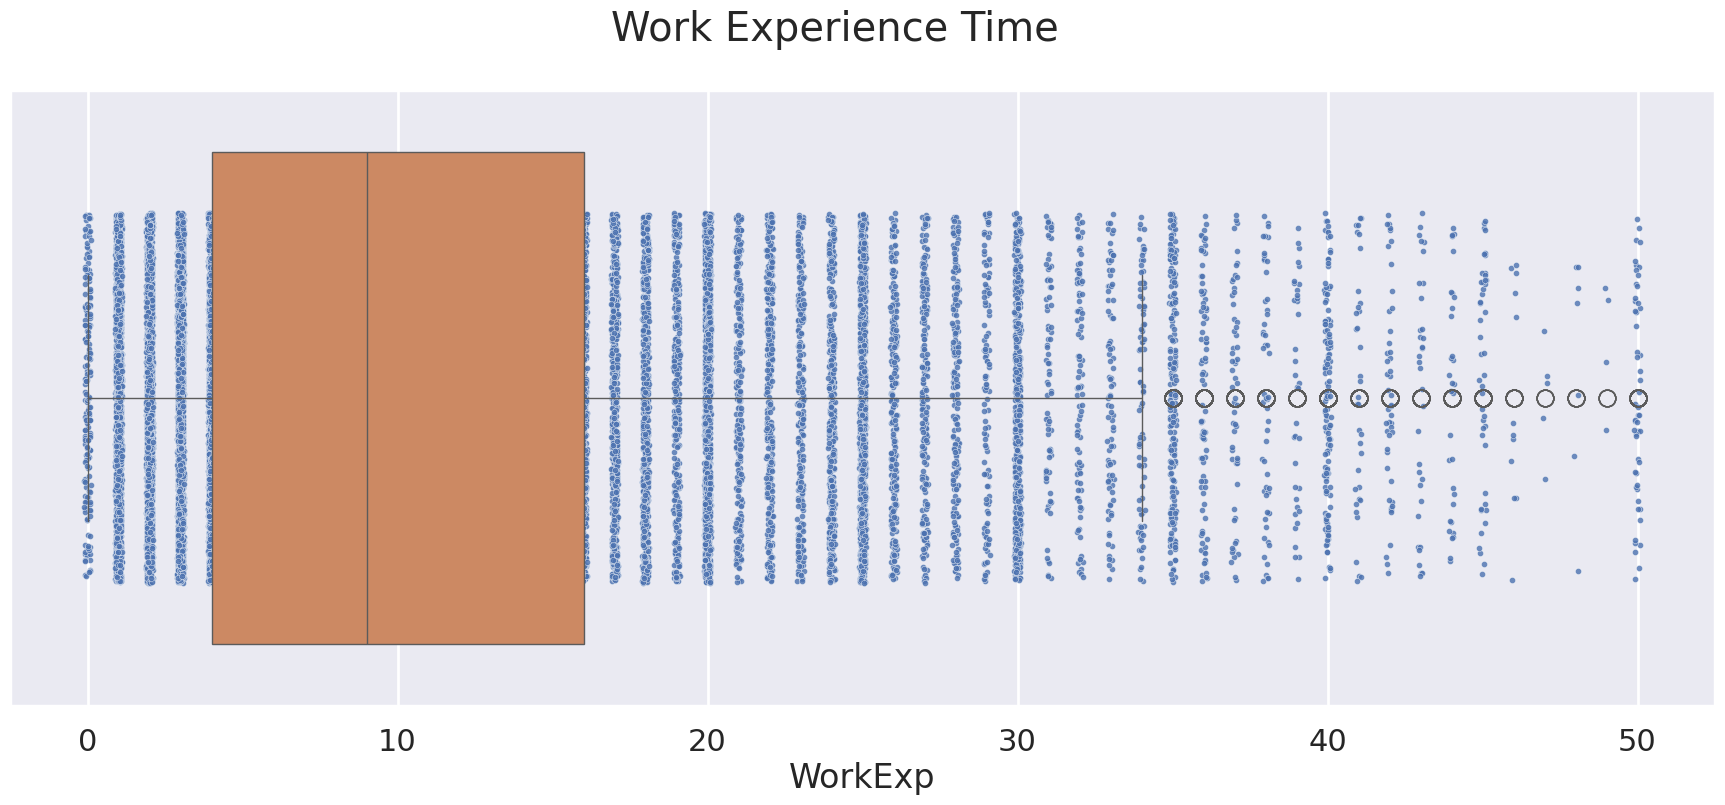

In [ ]:
 fig, ax=plt.subplots(figsize=(22,8))

sns.scatterplot(data=df,  ax=ax, x=x_scatter, y=y_scatter, alpha=0.8, s=20)
sns.boxplot(data=df, ax=ax, x='WorkExp')

fig.suptitle('Work Experience Time')

plt.show()

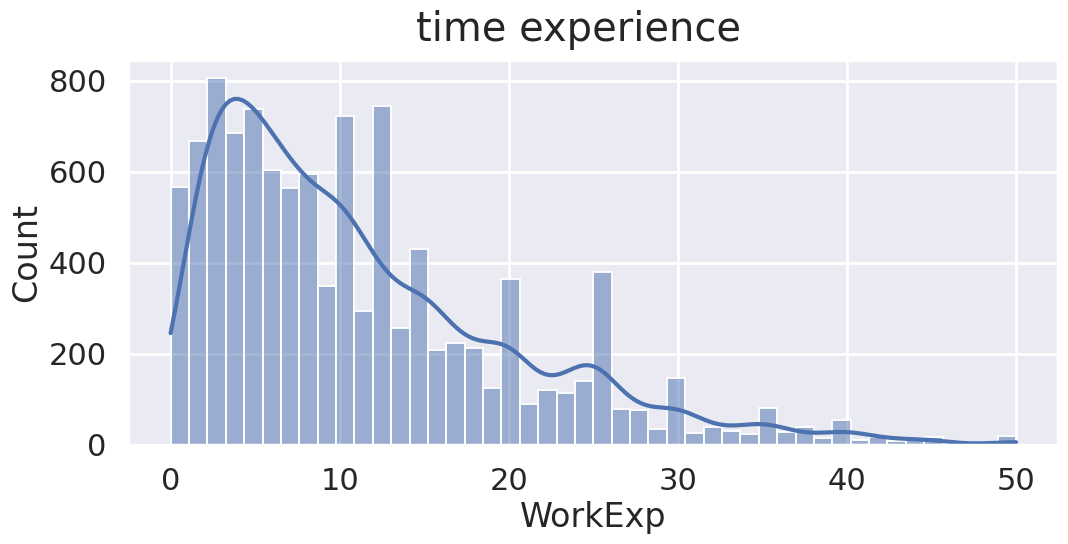

In [17]:
fig, ax=plt.subplots(figsize=(12,5))

sns.histplot(data=df, x='WorkExp', ax=ax, kde=True)
fig.suptitle('time experience')

plt.show()



In [18]:
df['WorkExp'].value_counts()

,count
WorkExp,
3.0,805
5.0,737
10.0,722
4.0,684
2.0,667
6.0,603
8.0,594
7.0,564
1.0,498


In [21]:
df['Age'].value_counts(normalize=True, dropna=True).apply(lambda x: f'{100 * x:.2f}%')

,proportion
Age,
25-34 years old,37.26%
35-44 years old,23.77%
18-24 years old,19.98%
45-54 years old,9.91%
55-64 years old,3.88%
Under 18 years old,3.53%
65 years or older,1.21%
Prefer not to say,0.46%


In [23]:
df['Age'].unique()

array(['Under 18 years old', '35-44 years old', '45-54 years old',
       '18-24 years old', '25-34 years old', '55-64 years old',
       'Prefer not to say', '65 years or older'], dtype=object)

In [22]:
mapa_idade = {
    'Under 18 years old' : '[00 - 18]',
    '18-24 years old' : '[18 - 24]',
    '25-34 years old' : '[25 - 34]',
    '35-44 years old' : '[35 - 44]',
    '45-54 years old' : '[45 - 54]',
    '55-64 years old' : '[55 - 64]',
    '65 years or older' : '[65 - 99]',
    'Prefer not to say' : '[??]',
    np.NaN : '[??]'

}

In [24]:
df['Age_new'] = df['Age'].map(mapa_idade)

In [28]:
df2 = df.loc[df['Age_new'] != '[??]']

In [34]:
df2['Age_new'].value_counts(dropna=False).sort_index()

,count
Age_new,
[00 - 18],709
[18 - 24],4012
[25 - 34],7482
[35 - 44],4774
[45 - 54],1990
[55 - 64],779
[65 - 99],242


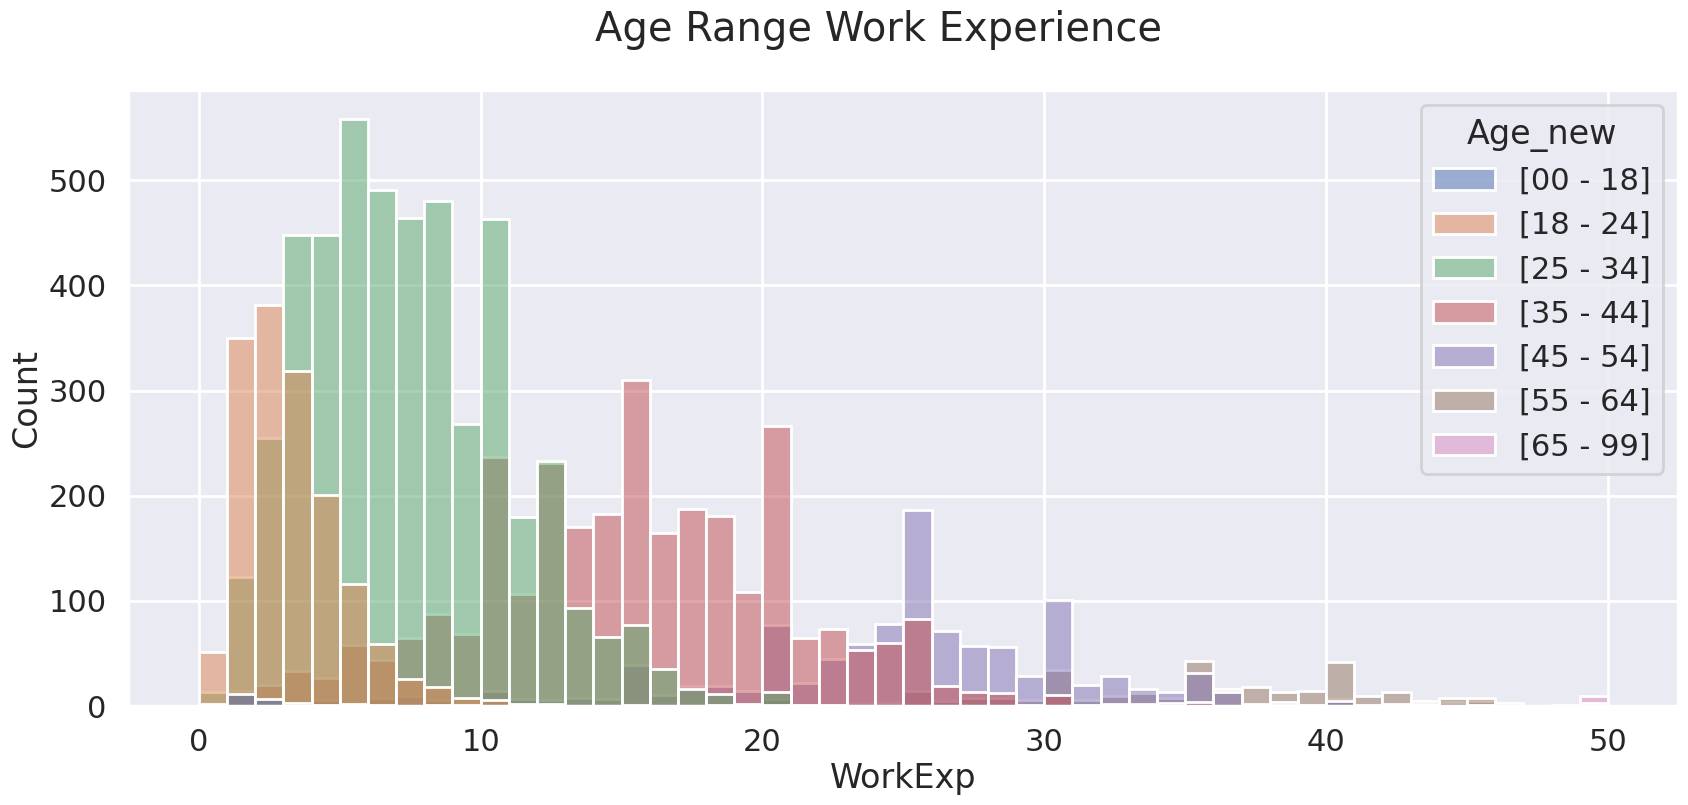

In [48]:
fig, ax = plt.subplots(figsize=(20,8))

idade = sorted(df2['Age_new'].unique())

sns.histplot(data=df2 , ax=ax, hue='Age_new', x='WorkExp', binwidth=1.0, hue_order=idade)
fig.suptitle('Age Range Work Experience')


plt.show()

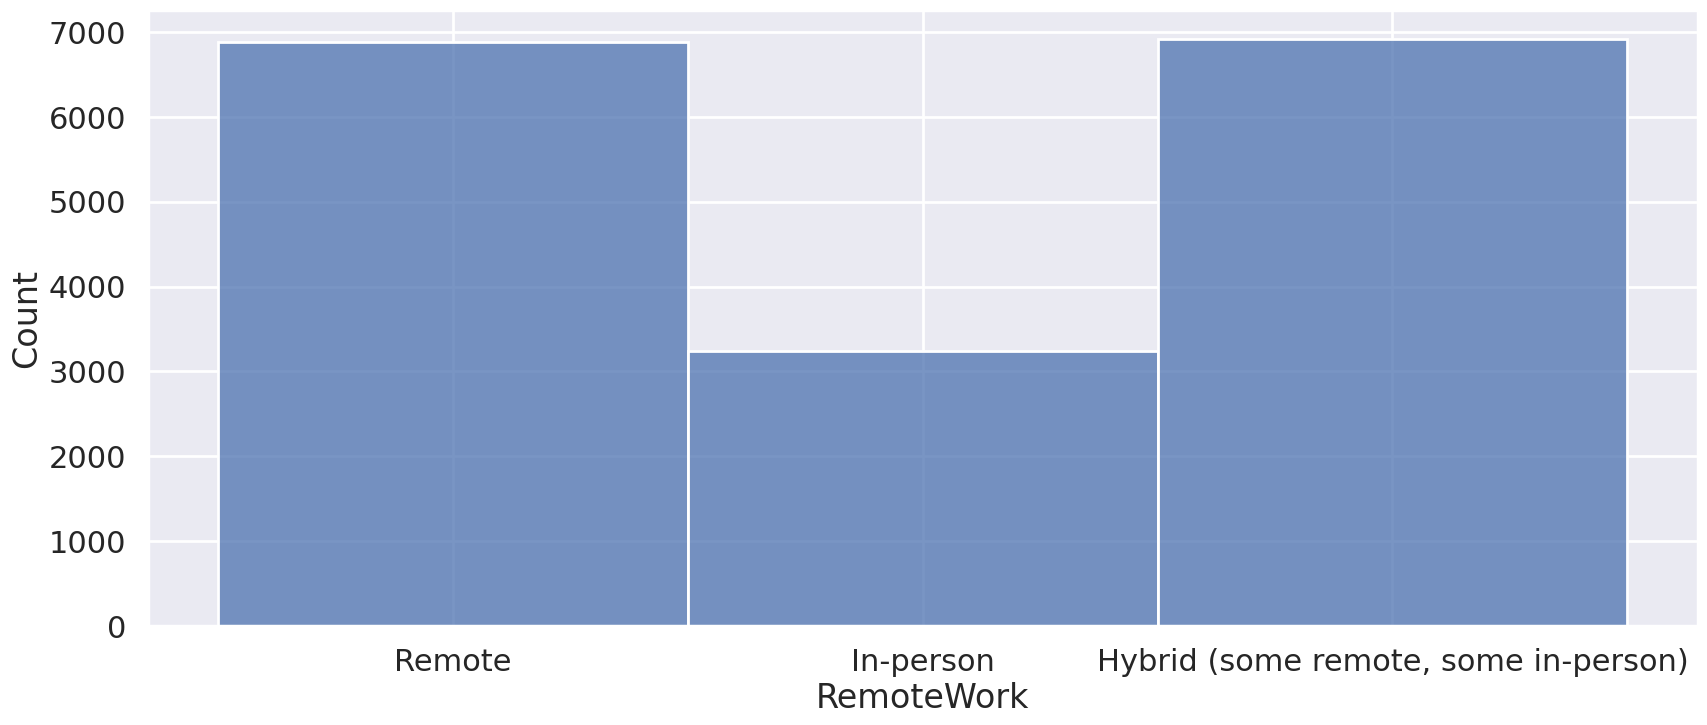

In [54]:
fig, ax=plt.subplots(figsize=(20,8))

sns.histplot(data=df, x='RemoteWork', binwidth=1.0,)
plt.show()

In [ ]:
#correlacao das variaveis

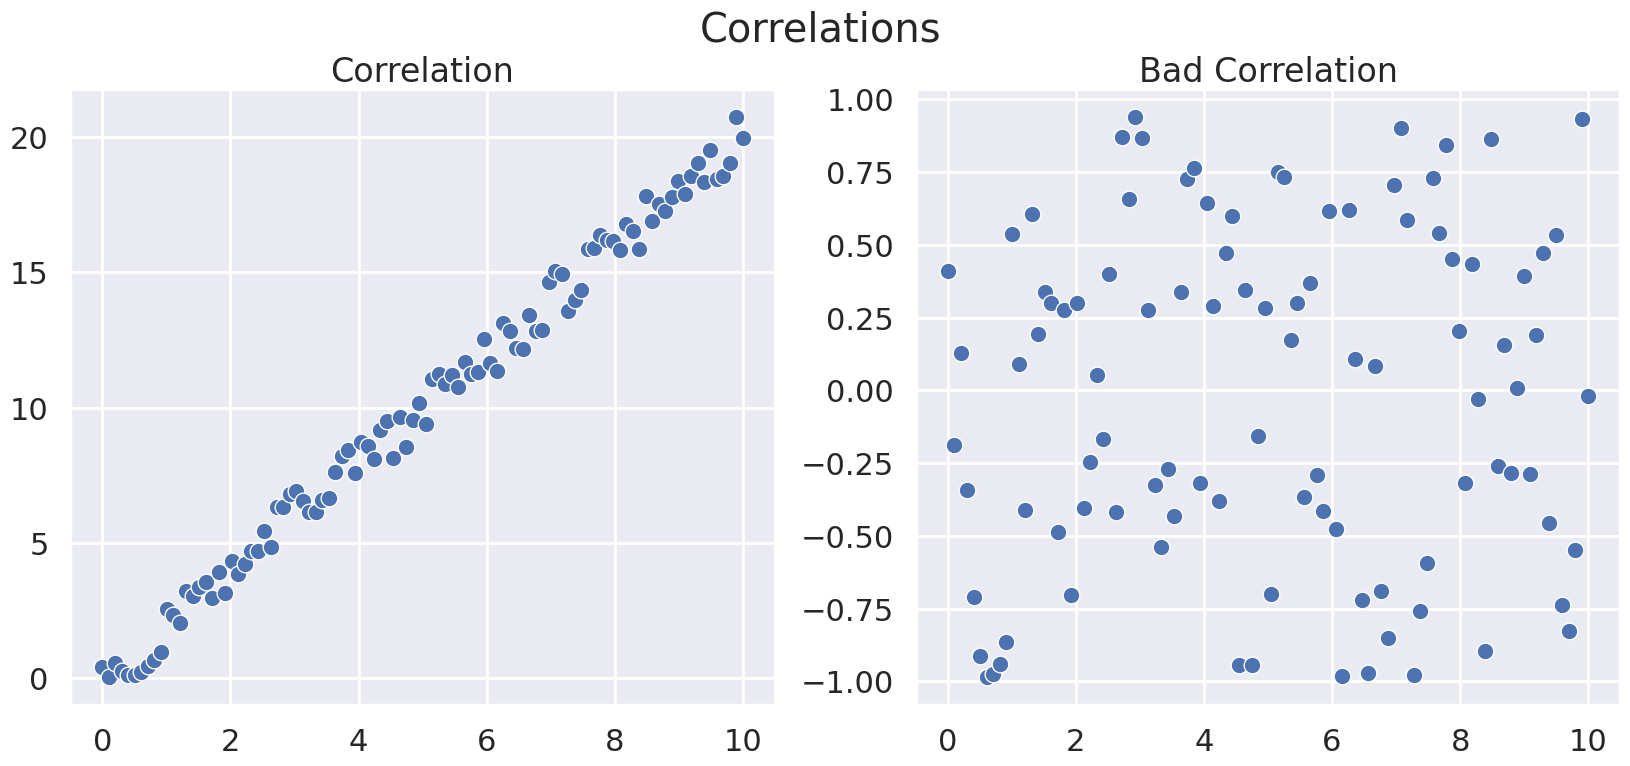

In [58]:
x = np.linspace(0, 10, 100)
y_random = np.random.uniform(-1,1,100)

y_corr = x*2+y_random

fig, (ax_left, ax_right) = plt.subplots(figsize=(20,8), ncols=2)

sns.scatterplot(x=x, ax=ax_left, y=y_corr)
ax_left.set_title('Correlation')

sns.scatterplot(ax=ax_right, x=x, y=y_random)
ax_right.set_title('Bad Correlation')

fig.suptitle('Correlations')
plt.show()


In [ ]:
#correlacao do salario com o tempo de trabalho

In [ ]:
#a existencia de um valor muito alto chama a atencao de erros nos dados, dessa forma é necessario tratar os dados para uma melhor visualizacao

In [60]:
df_filter = df.loc[df['ConvertedCompYearly'] <= 500_000]

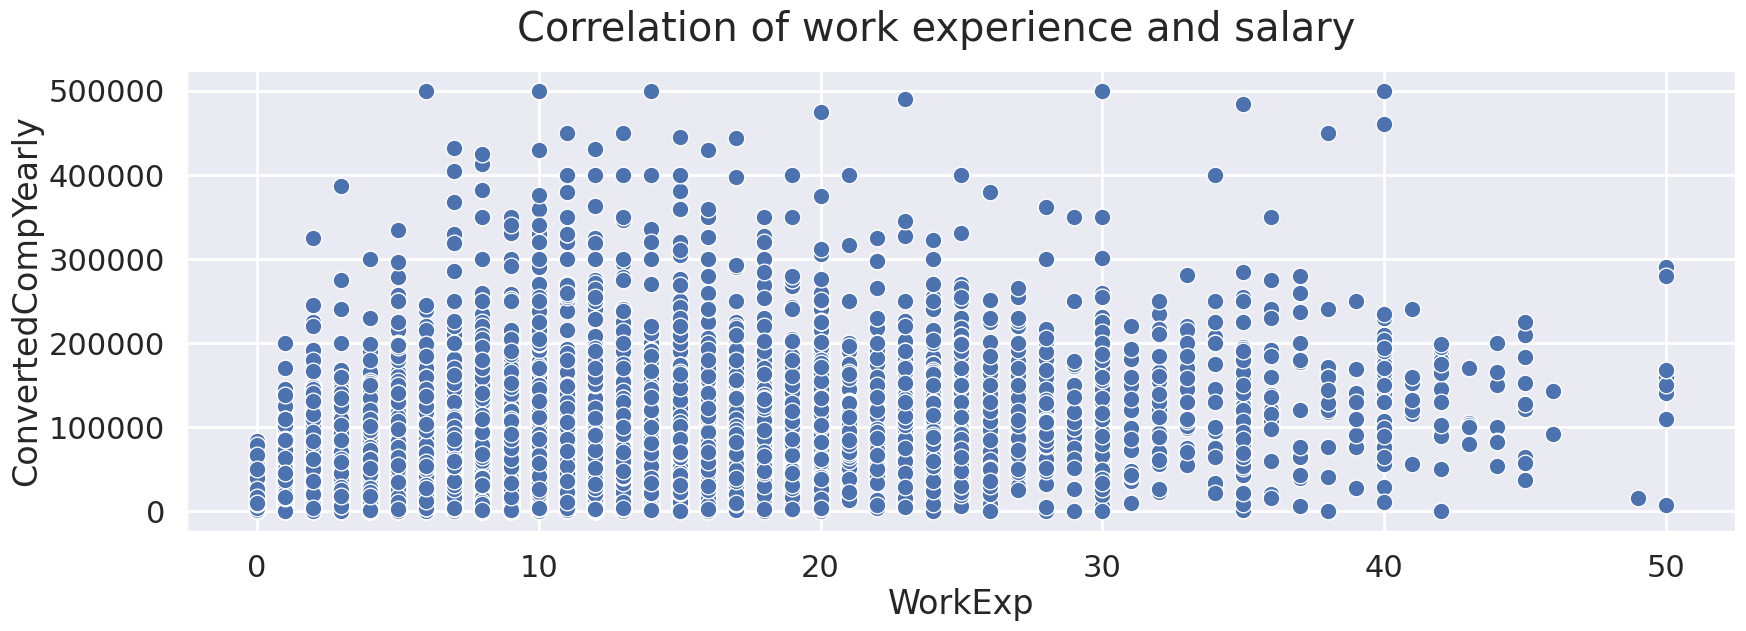

In [62]:
fig, ax=plt.subplots(figsize=(20,6))

sns.scatterplot(data=df_filter, x='WorkExp', y='ConvertedCompYearly')
fig.suptitle('Correlation of work experience and salary')

plt.show()

In [63]:
cut = 300_000

df_up = df_filter.loc[df_filter['ConvertedCompYearly'] > cut ]
df_down = df_filter.loc[df_filter['ConvertedCompYearly'] <= cut]

Text(0.5, 0.98, 'Correlations')

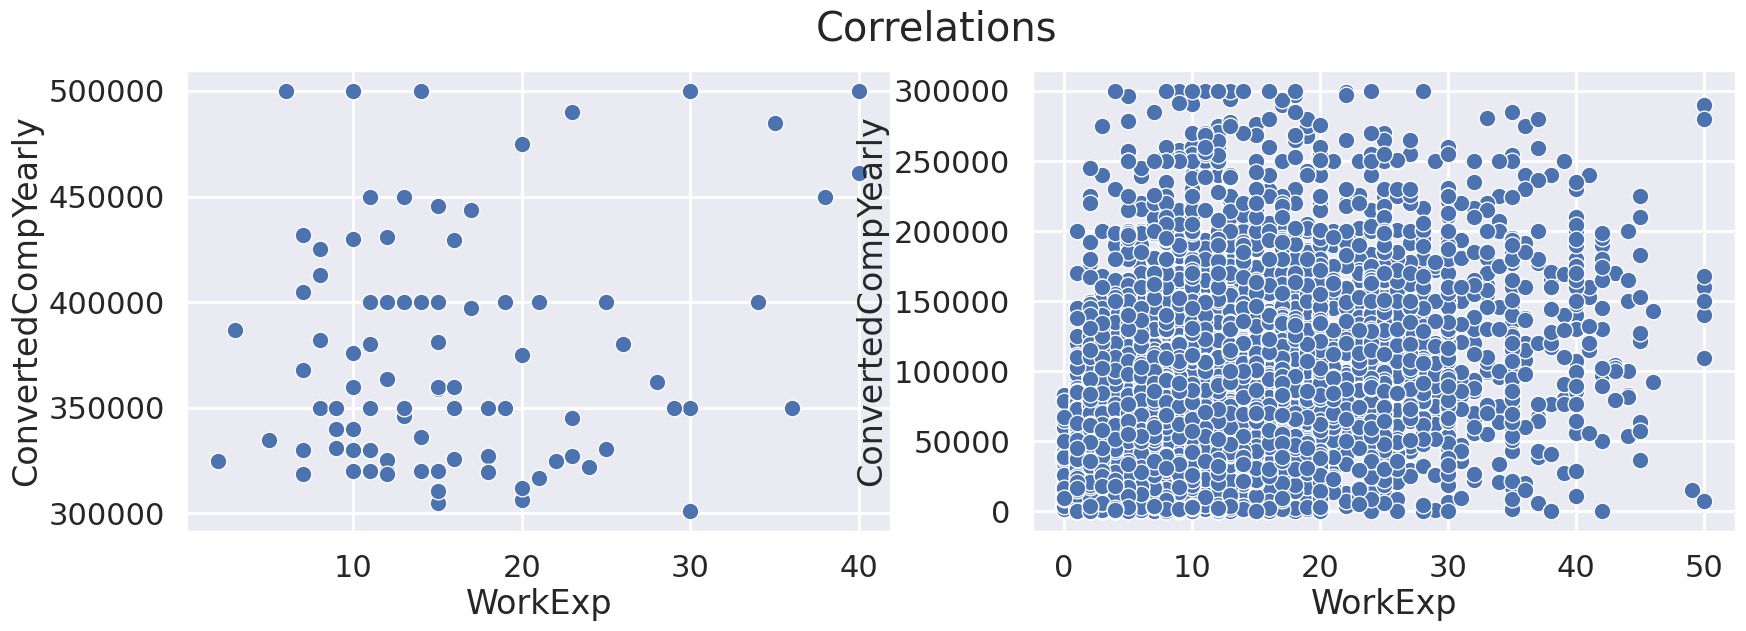

In [64]:
fig, (ax_up, ax_down) = plt.subplots(figsize=(20,6), ncols=2)

sns.scatterplot(data=df_up, x='WorkExp', y='ConvertedCompYearly', ax=ax_up)
sns.scatterplot(data=df_down, x='WorkExp', y='ConvertedCompYearly', ax=ax_down)

fig.suptitle('Correlations')


In [65]:
df_up[['WorkExp', 'ConvertedCompYearly']].corr()

,WorkExp,ConvertedCompYearly
WorkExp,1.000000,0.156832
ConvertedCompYearly,0.156832,1.000000


In [66]:
df_down[['WorkExp', 'ConvertedCompYearly']].corr()

,WorkExp,ConvertedCompYearly
WorkExp,1.000000,0.422742
ConvertedCompYearly,0.422742,1.000000


In [ ]:
# A correlacao do salario com o tempo de trabalho é maior com salarios menores que 300k por ano

Text(0.5, 0.98, 'Correlations')

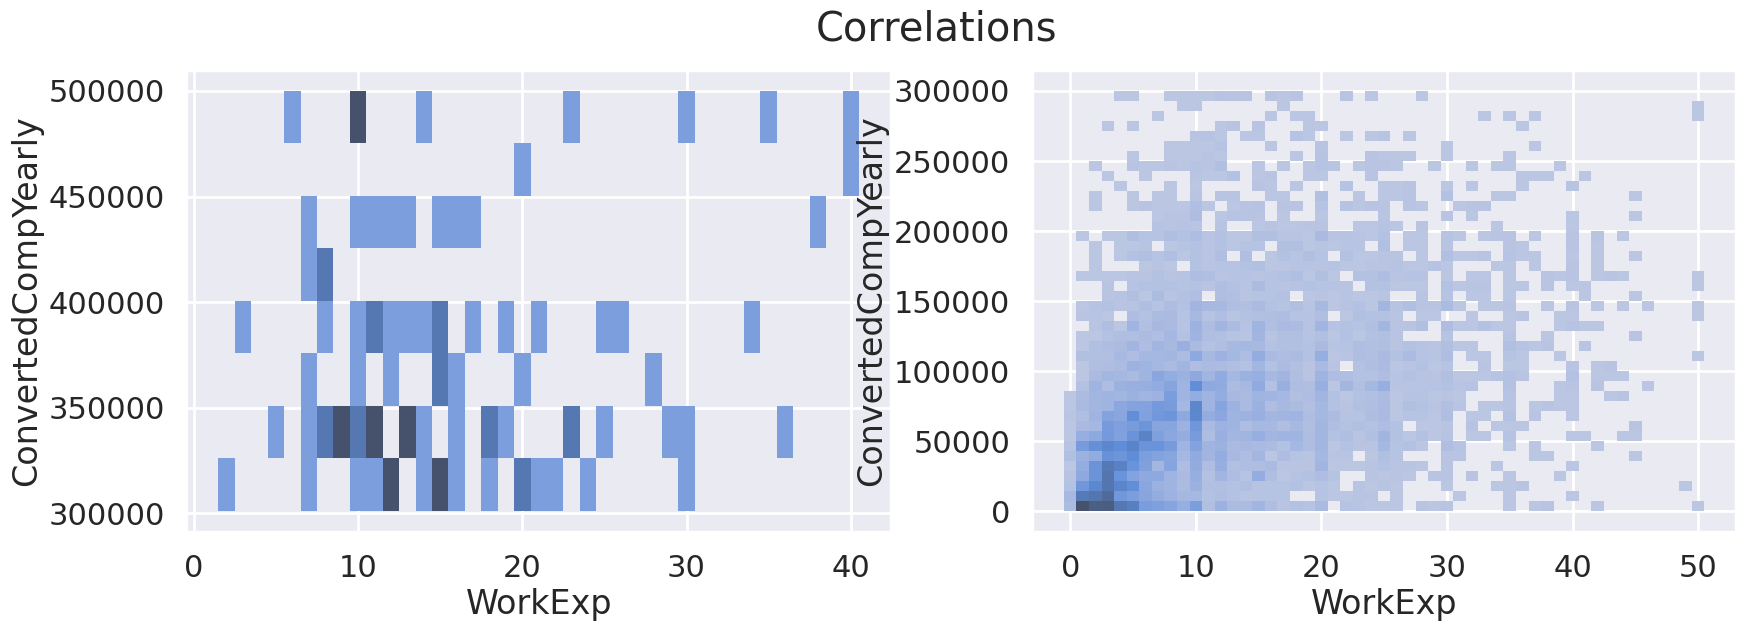

In [67]:
fig, (ax_up, ax_down) = plt.subplots(figsize=(20,6), ncols=2)

sns.histplot(data=df_up, x='WorkExp', y='ConvertedCompYearly', ax=ax_up, discrete=(True, False))
sns.histplot(data=df_down, x='WorkExp', y='ConvertedCompYearly', ax=ax_down, discrete=(True, False))

fig.suptitle('Correlations')

In [68]:
countrys = ['United States of America', 'Germany', 'Brazil', 'South Africa', 'India', 'Australia']

df_paises = df_filter.loc[df_filter['Country'].isin(countrys)]

In [70]:
df_paises['Country'].value_counts()

,count
Country,
United States of America,2103
Germany,983
India,534
Brazil,320
Australia,273
South Africa,73


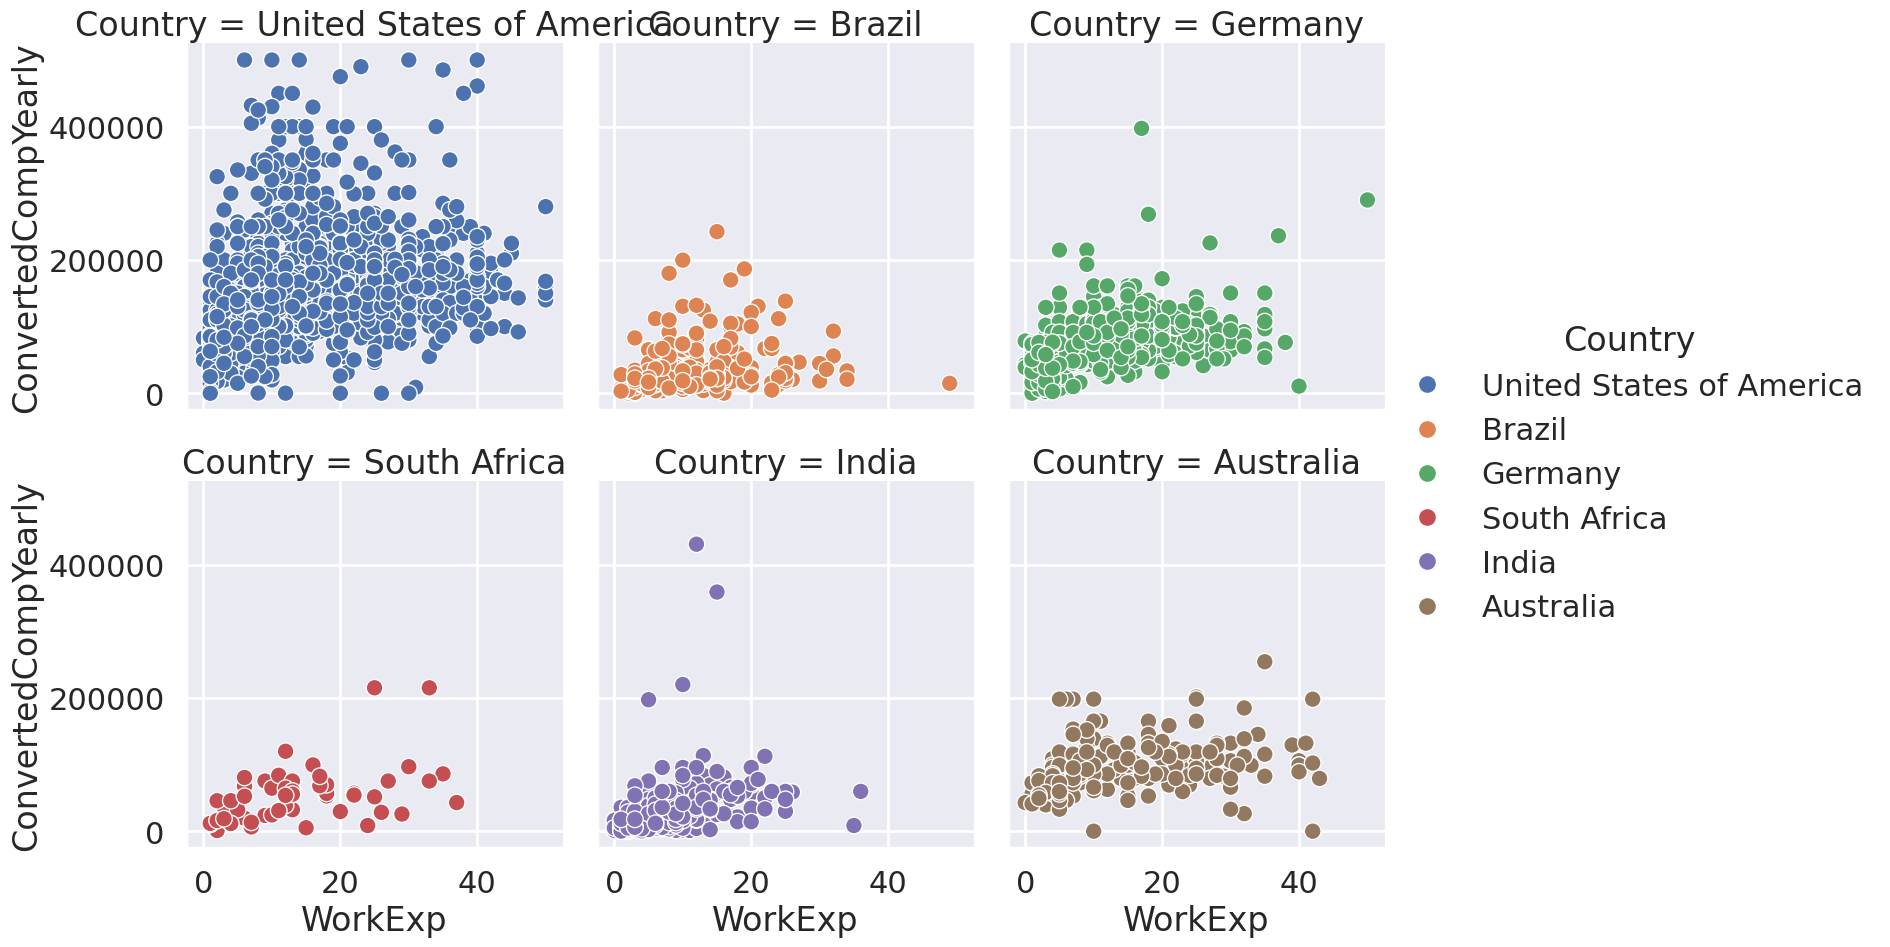

In [72]:
sns.relplot(data=df_paises, x='WorkExp', y='ConvertedCompYearly', hue='Country', col='Country', col_wrap=3,)

In [74]:
df_paises[['WorkExp', 'ConvertedCompYearly', 'Country']].groupby('Country').corr()

WorkExp  ConvertedCompYearly
Country                                                                    
Australia                WorkExp              1.000000             0.254687
                         ConvertedCompYearly  0.254687             1.000000
Brazil                   WorkExp              1.000000             0.275680
                         ConvertedCompYearly  0.275680             1.000000
Germany                  WorkExp              1.000000             0.441056
                         ConvertedCompYearly  0.441056             1.000000
India                    WorkExp              1.000000             0.423021
                         ConvertedCompYearly  0.423021             1.000000
South Africa             WorkExp              1.000000             0.466509
                         ConvertedCompYearly  0.466509             1.000000
United States of America WorkExp              1.000000             0.257337
                         ConvertedCompYearly  0.257337             1.000000